<a href="https://colab.research.google.com/github/patelmedha/Prediction-of-Product-Sales/blob/main/PREDICTION_OF_PRODUCT_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**
Author: Medha Patel

##Project Overview

  This project aims to help retailers understand the properties of their products and outlets that play crucial roles in increasing sales. Using data analysis and machine learning techniques, the project will identify the most significant factors that influence sales performance and explore segmentation strategies to group similar products and outlets together. The goal is to provide retailers with a comprehensive understanding of their sales data and enable them to make data-driven decisions that increase revenue, improve customer satisfaction, and drive long-term success. An interactive dashboard will allow retailers to visualize and explore the data, experiment with input parameters, and generate custom reports.

##Load and Inspect Data

### Data Dictionary

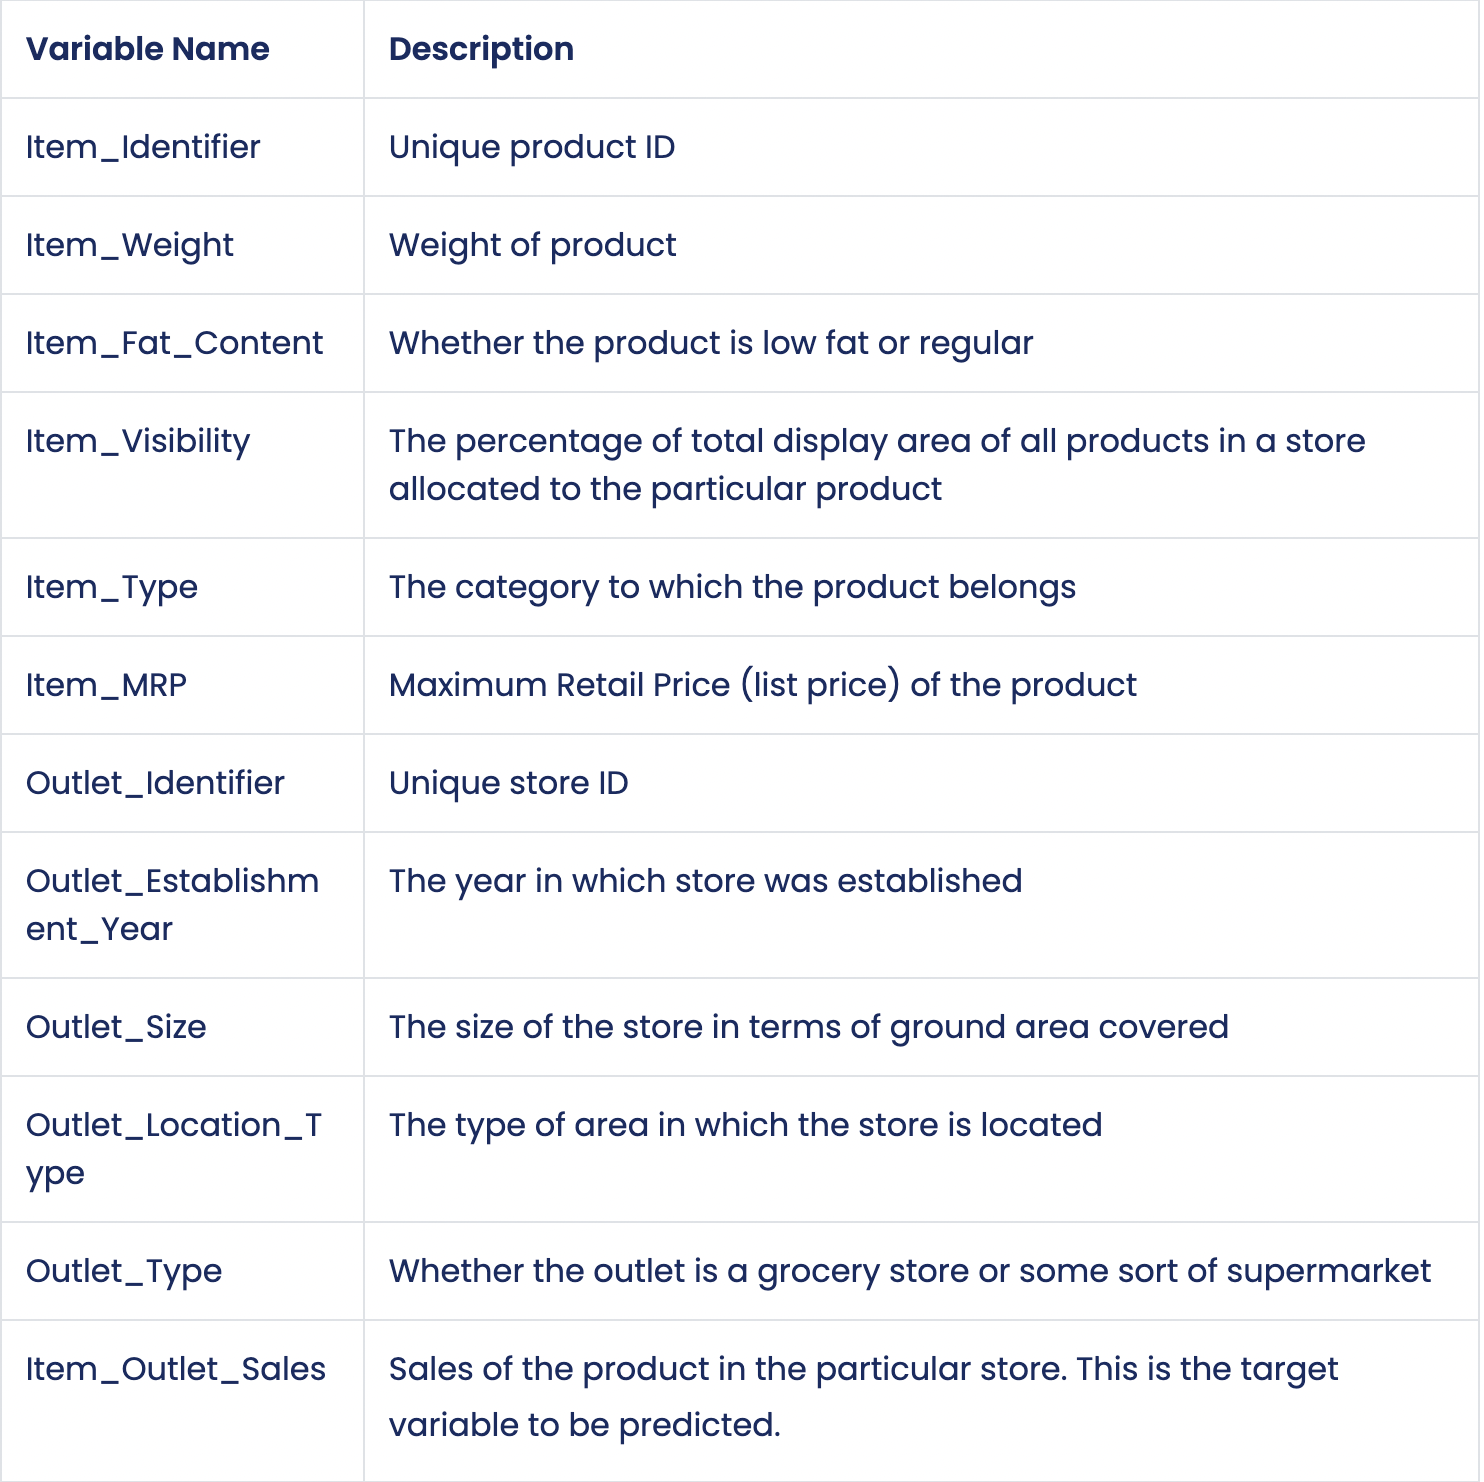

Import Libraries

In [1]:
import pandas as pd
import numpy as np

### Load Data

In [2]:
#Load Data
file_url = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/PROJECT: PREDICTION OF PRODUCT SALES/Data/sales_predictions_2023.csv'

df = pd.read_csv(file_url)

###Inspect Data

####Head()

In [3]:
#Head()
df.head(8523)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


####shape()

In [4]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 8523 rows, and 12 columns.


####dtypes

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

####Info()

In [6]:
#Info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


####describe()

In [7]:
#Descriptive statistics for numeric columns
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#Descriptive statistics for categoric columns
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


##Clean Data

####Dropping/Replacing Columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Oulet_Location_Type can be converted in numerical column

In [10]:
# Remove  the "Tier" from 'Outlet_Location_Type' column by replacing it with nothing
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].str.replace('Tier','')
# Check the .value_counts to confirm the change
df['Outlet_Location_Type'].value_counts()

 3    3350
 2    2785
 1    2388
Name: Outlet_Location_Type, dtype: int64

####Duplicated Data


In [11]:
dup_rows = df.duplicated().sum()
print(f'There are {dup_rows} duplicate rows.')

There are 0 duplicate rows.


####Unique Values

In [12]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
#Unique Value percentage
unique_percentage = df.nunique()/len(df) * 100
unique_percentage

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

####Missing Values

In [14]:
#Finding number of missing values
missing_values = df.isna().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
#percent of missing_values
missing_values_percent = missing_values/len(df) * 100
missing_values_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

####Fixing Data Types

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


####Visualizing Missing Values with Missingno

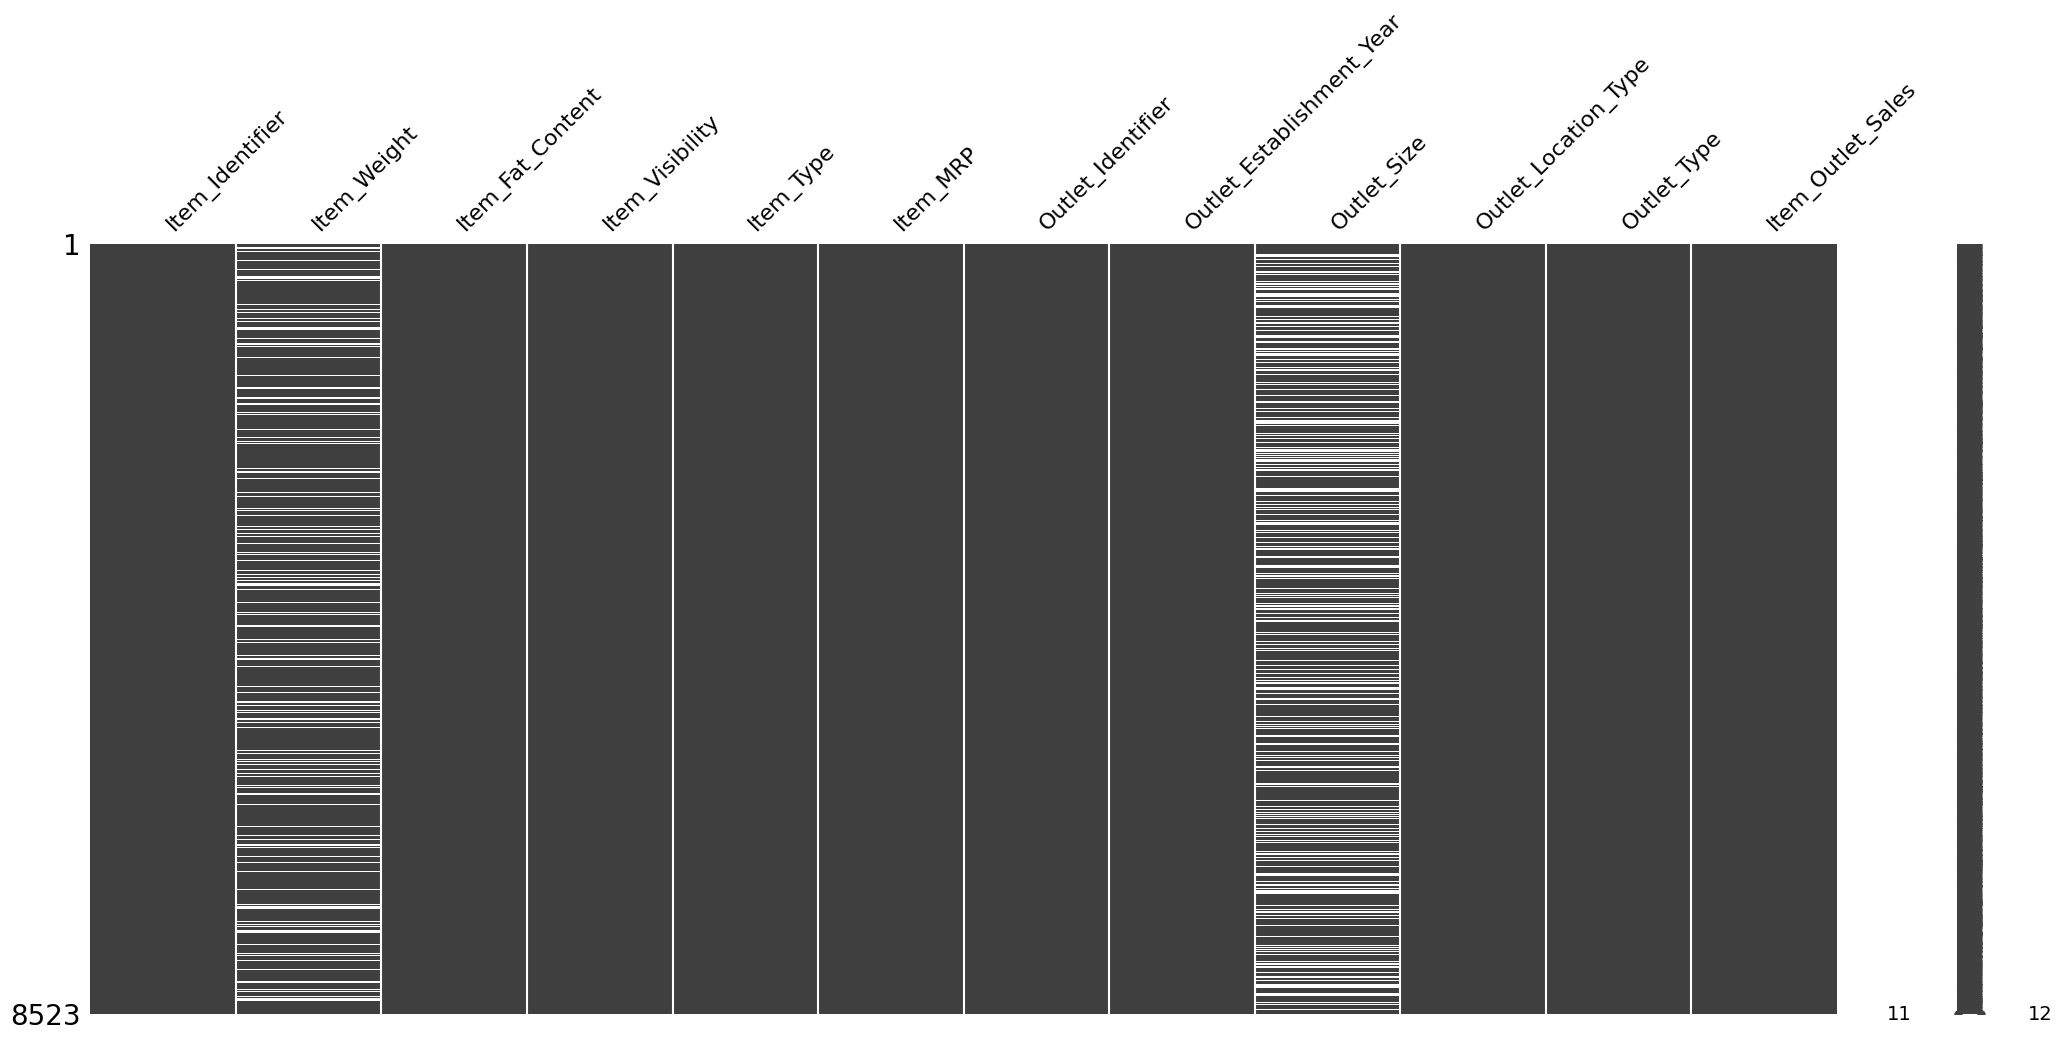

In [17]:
import missingno as msno
msno.matrix(df);

#####Address the Null Values


######Null Values in Categorical Columns

In [18]:
# save list of categorical column name.
categorical_col = df.select_dtypes('object').columns
categorical_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
# Check for nunique for categorical columns
for col in categorical_col:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


##### Data Consistency- Categorical Columns




In [20]:
# Item_Fat_Content- fix the values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat' , 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg' , 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###### **Replacing Data in Categorical Columns**
- **Drop the column**
 - con: This would result in a significant loss of data.
 - +50% missing values per row would be significant enough to justify this option.

- **Drop rows with missing values**
 - con: This would result in a significant loss of data.
 - +5% missing values per column would too great to justify this option, however -5% missing values would justify this option.

- **Replace missing values with the value 'Unknown'**
 - pro: This typically will not create bias in favor of a specific label or class.
 - con: This will not factor correlations between features.

- **Impute missing values using the most frequent value, 'mode', value of the column**
 - pro: This typically works well with small numeric datasets.
 - con: This may create bias in favor of a specific label or class.
 - con: This will not factor correlations between features.


In [21]:
#Replace missing categorical column values with 'Unknown'
#Replacing with 'Unknown' since, about 28% of the data is missing. 
# this is to avoid any bias, or significant loss of data.
df['Outlet_Size'] = df['Outlet_Size'].fillna('Unknown')


#####Data Consistency- Numrical Columns

In [22]:
# Have list of numerical column name. 
numerical_col = df.select_dtypes(['int', 'float']).columns
numerical_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
# check for nunique for numerical columns
for col in numerical_col:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


Value Counts for Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Value Counts for Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


Value Counts for Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


Value Counts for Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845

###### **Replacing Data in Numeric Columns**
- **Drop the column**
 - con: This would result in a significant loss of data.
 - +50% missing values per row would be significant enough to justify this option.

- **Drop rows with missing values**
 - con: This would result in a significant loss of data.
 - +5% missing values per column would too great to justify this option, however -5% missing values would justify this option.

- **Impute missing values using the 'mean' value of the column**
 - pro: This typically works well with small numeric datasets.
 - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
 - con: This will not factor correlations between features.

- **Impute missing values using the 'median' value of the column**
 - pro: This typically works well with small numeric datasets.
 - pro: This is less affected by outliers than strategy = 'mean'.
 - con: This will not factor correlations between features.

In [24]:
import statistics as stat
weight_median = df['Item_Weight'].median()

In [25]:
# Impute missing values using 'median' value
##Replacing with 'median' value since, about 17% of the data is unknown- to avoid any bias, or losing valueable data.
##Using Median to replace missing values since it is less affected by skew and outliers.
df['Item_Weight'] = df['Item_Weight'].fillna(weight_median)


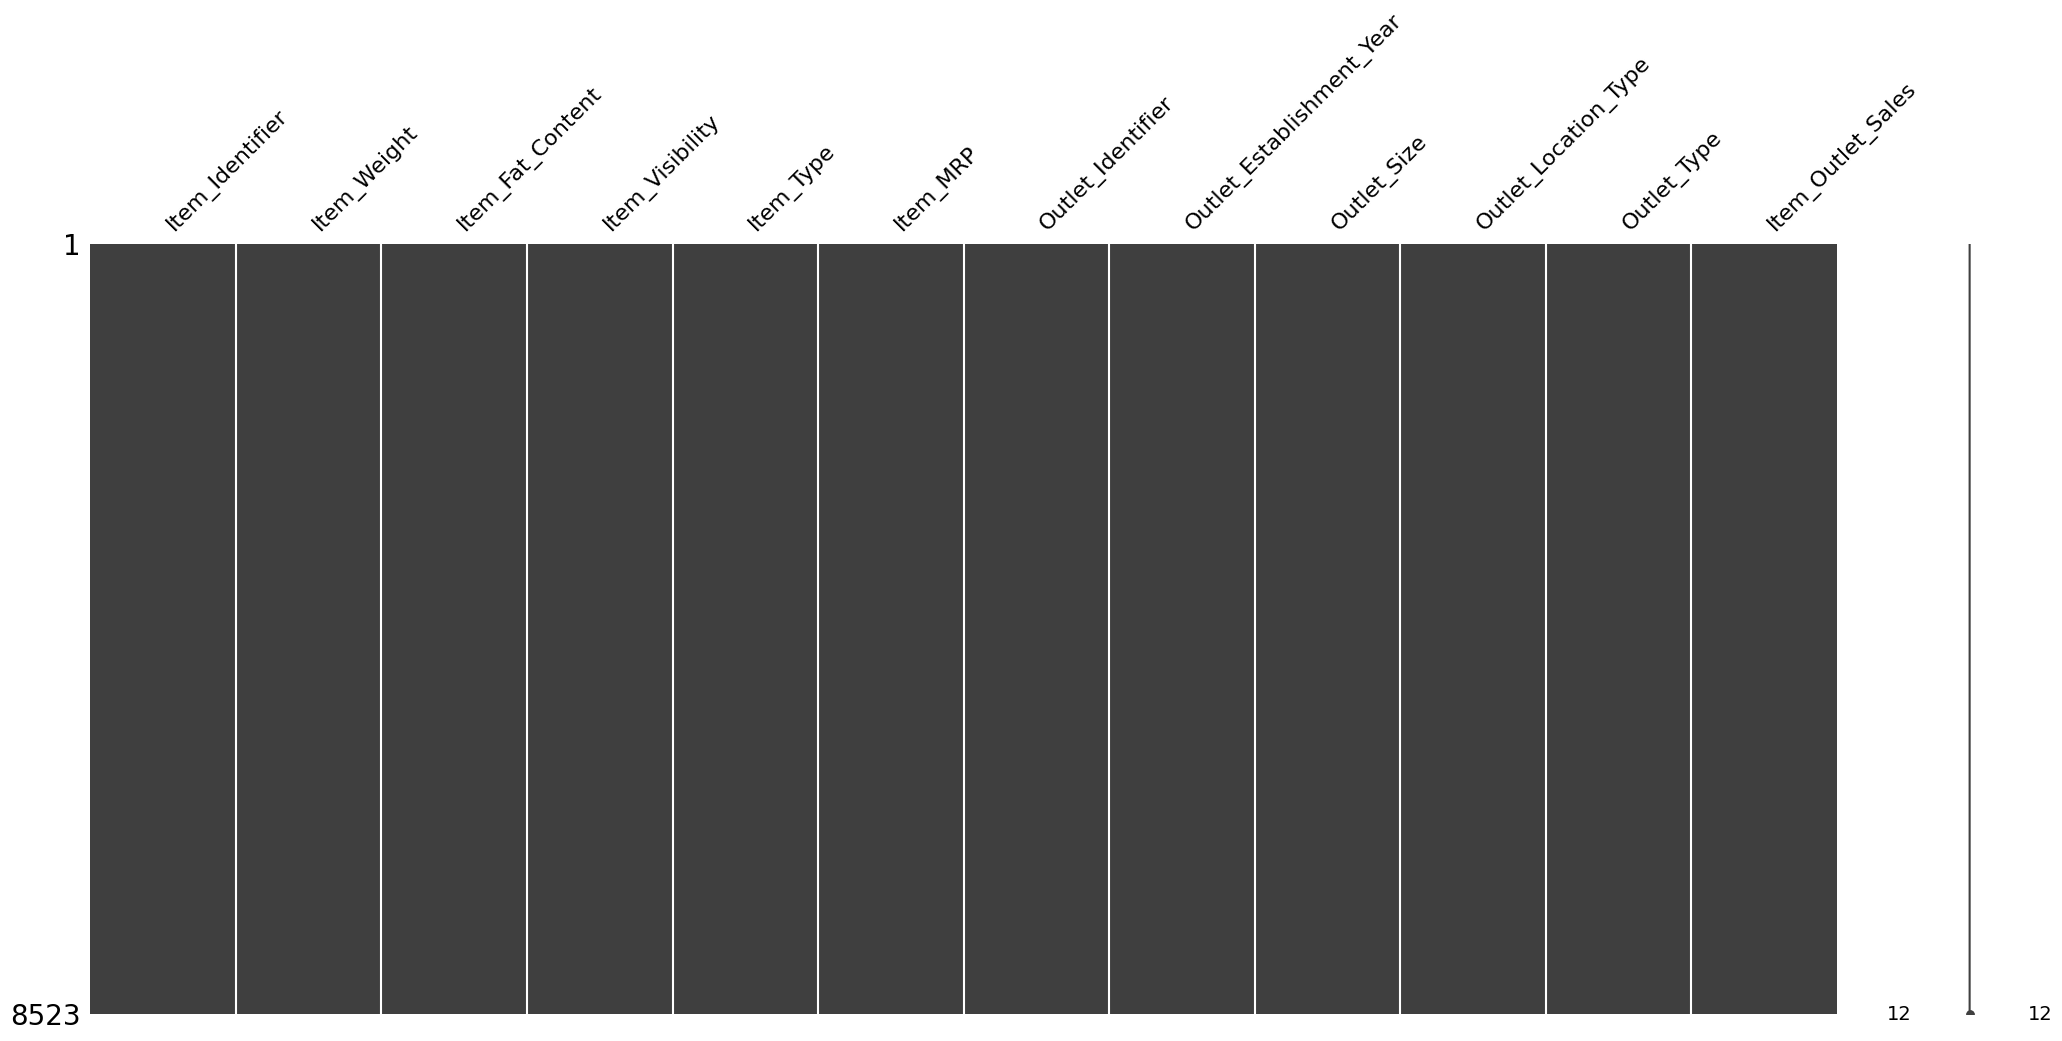

In [26]:
#Using missingno to visualize all the missing values have been replaced
msno.matrix(df);

In [27]:
#checking Data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [28]:
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


#### Summary Statistic for Numerical Columns
For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [29]:
df.describe(include = 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

##Explanatory Data Analysis